# Titanic Dataset:Predict the survival on the Titanic
#### Data Science Project - [Kaggle](https://www.kaggle.com/c/titanic)

                          ====================================================

This project is divided in 5 sections:

1. Introduction

2. Exploring The Data

    2.1 The Data
    
3. Exploratory Data Analysis (EDA)

    3.1 Describing Features
    
    3.2 Descriptive Figures
    
        3.2.1 Distribution Plots
        
        3.2.2 Boxplots
        
        3.2.3 Cross-correlation Plot
        
        3.2.4 Distribution Plots With Respect To Our Target Feature
        
        3.2.5 Pair Plots With Respect To Our Target Feature
    
    3.3 Feature Engineering

        3.3.1 Skewed Features: Log Transform
        
        3.3.2 Removing Some Features
        
        3.3.3 Normalization Of Numerical Features
        
        3.3.4 Processing Categorical Feature: One Hot-Encoding

4. Model Selection

    4.1 Data Preparation: Training and Testing Sets

    4.2 Model Selection: Logistic Regression
    
        4.2.1 Logistic Regression
        
        4.2.2 Confusion Matrix, Precision, Recall, F1-Score

5. Actionable Recommendations

# 1. Introduction

The task is to predict what sorts of people more likely to survive in the RMS Titanic sank after colliding with an iceberg 


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pickle
%matplotlib inline

# 2. Exploring the Data

## 2.1 The data:

There is 3 data set provided with this problem.The train, test and gender_submission

_**We will perform the exploratory data analysis on the training set, and make predictions on the test data set**_

In [2]:
#reading files
def reading_file(data):    
    return pd.read_csv(data)

In [3]:
train_data= reading_file('train.csv')
test_data= reading_file('test.csv')
survived_test=reading_file('gender_submission.csv')

In [4]:
# checking the file got loaded properly by selecting top rows
def head(data):
    return data.head()
    

In [5]:
# information about the data set 
def info(data):
    return data.info()


In [6]:
# number of columns in the dataset
def columns(data):
    return data.columns


In [7]:
#finding duplicates in the dataset
def find_duplicate(data):
    return data.duplicated().sum()   


In [8]:
# finding missing values and count for each column
def missing_values(data):
    cols=columns(data)
    for col in cols:
        print(col+ " :" + str(data[col].isnull().sum()))
    

In [9]:
head(train_data)  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
head(test_data) 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
head(survived_test) 

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


All the 3 dataset got loaded successfully

In [12]:
info(train_data)      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


By looking at the information there are lot of missing values for cabin variable and few missing values for age variable

In [13]:
info(test_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
info(survived_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [15]:
columns(train_data)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
columns(test_data)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
columns(survived_test)

Index(['PassengerId', 'Survived'], dtype='object')

'Survived' is the target variable. Its value is either 0 or 1 and will be classification model to predict the 'Survived'

In [18]:
find_duplicate(train_data)

0

In [19]:
find_duplicate(test_data)

0

In [20]:
find_duplicate(survived_test)

0

There are no duplicate values in all the 3 dataset

In [21]:
test_data=test_data.merge(survived_test, how='inner', on='PassengerId')  # merging survived column with test data

In [22]:
head(test_data)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [23]:
missing_values(train_data)

PassengerId :0
Survived :0
Pclass :0
Name :0
Sex :0
Age :177
SibSp :0
Parch :0
Ticket :0
Fare :0
Cabin :687
Embarked :2


Cabin varibale has lot of misisng values and age variable has few missing variables

In [24]:
missing_values(test_data)

PassengerId :0
Pclass :0
Name :0
Sex :0
Age :86
SibSp :0
Parch :0
Ticket :0
Fare :1
Cabin :327
Embarked :0
Survived :0


Dropping variables which is not significant and have lot of missing values

In [25]:
train_data= train_data.drop(columns =['PassengerId', 'Name','Cabin','Ticket','Fare'])


In [26]:
test_data=test_data.drop(columns =['PassengerId', 'Name','Cabin','Ticket','Fare'])

In [27]:
head(train_data)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [28]:
head(test_data)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,34.5,0,0,Q,0
1,3,female,47.0,1,0,S,1
2,2,male,62.0,0,0,Q,0
3,3,male,27.0,0,0,S,0
4,3,female,22.0,1,1,S,1


In [29]:
missing_values(train_data)

Survived :0
Pclass :0
Sex :0
Age :177
SibSp :0
Parch :0
Embarked :2


In [30]:
missing_values(test_data)

Pclass :0
Sex :0
Age :86
SibSp :0
Parch :0
Embarked :0
Survived :0


Text(0.5, 1.0, 'Age Distribution')

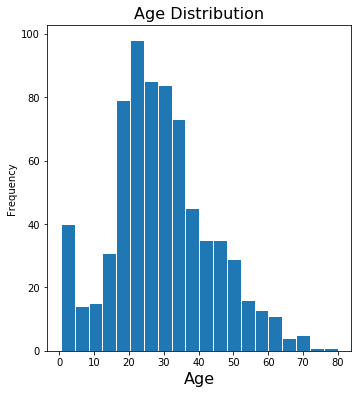

In [31]:
plt.subplot(1, 2, 1)
train_data['Age'].plot.hist(bins=20,figsize=(12, 6), edgecolor = 'white')
plt.xlabel('Age', fontsize=16)                                            #Understanding the distribution of Age variable
plt.title('Age Distribution', fontsize=16)                               # slightly skewed to the right

Imputing missing values with median

In [32]:
train_data['Age']=train_data['Age'].fillna(value=train_data['Age'].median())
test_data['Age']=test_data['Age'].fillna(value=train_data['Age'].median())  

In [33]:
missing_values(train_data)

Survived :0
Pclass :0
Sex :0
Age :0
SibSp :0
Parch :0
Embarked :2


In [34]:
missing_values(test_data)

Pclass :0
Sex :0
Age :0
SibSp :0
Parch :0
Embarked :0
Survived :0


In [35]:
train_data = train_data.dropna(how='any',axis=0)   # dropping other records which has missing values
test_data = test_data.dropna(how='any',axis=0)  

In [36]:
head(train_data)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [37]:
head(test_data)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,34.5,0,0,Q,0
1,3,female,47.0,1,0,S,1
2,2,male,62.0,0,0,Q,0
3,3,male,27.0,0,0,S,0
4,3,female,22.0,1,1,S,1


## Exploratory Analysis

In [38]:
cat_cols= ['Pclass','Sex','Embarked']
target=['Survived']
num_cols=['Age']

In [39]:
def countplot(features,data):
   
    for i in range(len(features)):
        fig1, ax1 = plt.subplots(figsize=(8, 6), sharex=True)
        sns.set(style="whitegrid", palette="pastel", color_codes=True)
        sns.countplot(x= data[features[i]],hue=data[target[0]],data=data)
        fig1.show()
        fig1.tight_layout()
        
def violinplot(features,data):
    
    for i in range(len(features)):
        fig2, ax2 = plt.subplots(figsize=(12, 10), sharex=True) 
        sns.set(style="whitegrid", palette="pastel", color_codes=True)
        sns.violinplot(x=data[target[0]], y=data[features[i]],hue=data[cat_cols[1]], data=train_data)
        
        
        

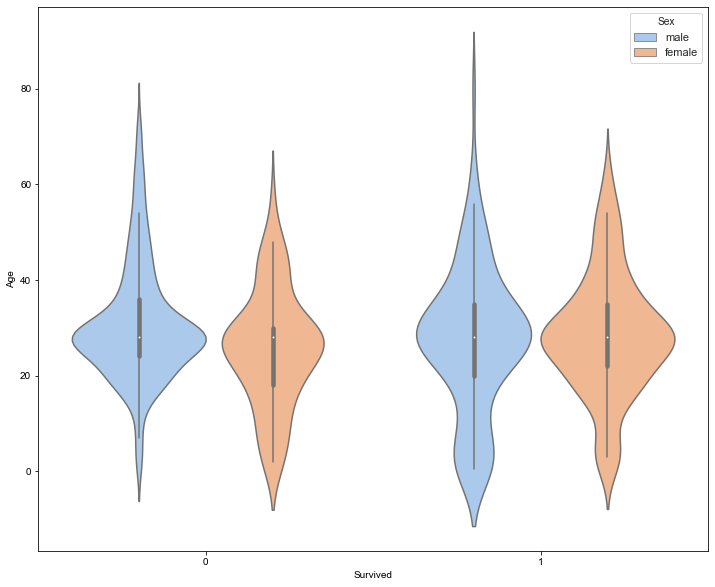

In [40]:
violinplot(num_cols,train_data)

By looking at the Age there is no significant difference in the age distribution for people who survived and not survived

C:\Users\venkata.b\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


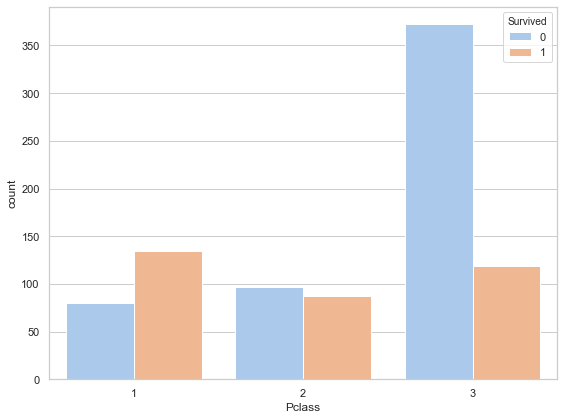

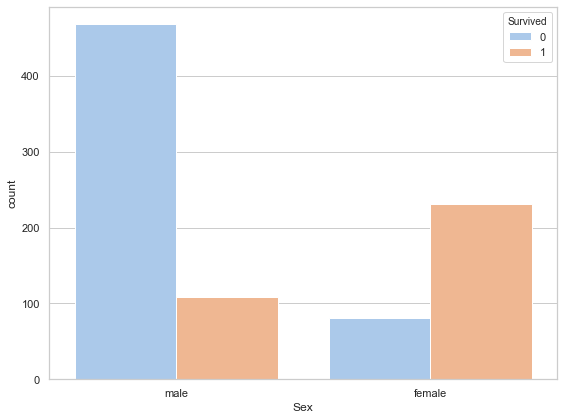

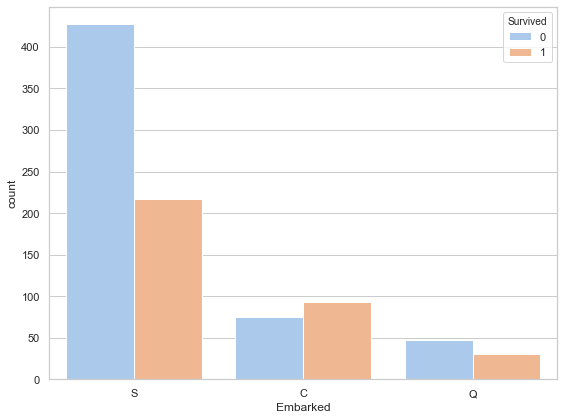

In [41]:
countplot(cat_cols,train_data)

From this plot the Pclass1 has better survival rate followed by Pclass2 followed by Pclass3.

Women has better survival rate compared to men

Embarked has better survival rate than the others

In [42]:
(train_data['Survived']==1).sum()/len(train_data)

0.38245219347581555

Overall survival rate is 38%

## Data Analysis using statsmodel

In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 95.6+ KB


In [47]:
train_data_sm=pd.get_dummies(data=train_data)

In [48]:
train_data_sm.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [49]:
Xtrain_sm = train_data_sm.loc[:, train_data_sm.columns != 'Survived']
ytrain_sm = train_data_sm['Survived']

In [50]:
head(Xtrain_sm)

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0
2,3,26.0,0,0,1,0,0,0,1
3,1,35.0,1,0,1,0,0,0,1
4,3,35.0,0,0,0,1,0,0,1


In [51]:
head(ytrain_sm)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [53]:
log_reg_sm = sm.Logit(ytrain_sm, Xtrain_sm).fit()

Optimization terminated successfully.
         Current function value: 0.441870
         Iterations 6


In [54]:
print(log_reg_sm.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            7
Date:                Thu, 24 Jun 2021   Pseudo R-squ.:                  0.3358
Time:                        08:19:46   Log-Likelihood:                -392.82
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 9.634e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.1567      0.126     -9.212      0.000      -1.403      -0.911
Age           -0.0396      0.008     -5.053      0.000      -0.055      -0.024
SibSp         -0.3116      0.108     -2.894      0.0

In [55]:
head(test_data)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,34.5,0,0,Q,0
1,3,female,47.0,1,0,S,1
2,2,male,62.0,0,0,Q,0
3,3,male,27.0,0,0,S,0
4,3,female,22.0,1,1,S,1


In [56]:
test_data_sm=pd.get_dummies(data=test_data)

In [57]:
head(test_data_sm)

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,0,0,1,0,1,0
1,3,47.0,1,0,1,1,0,0,0,1
2,2,62.0,0,0,0,0,1,0,1,0
3,3,27.0,0,0,0,0,1,0,0,1
4,3,22.0,1,1,1,1,0,0,0,1


In [58]:
Xtest_sm = test_data_sm.loc[:, test_data_sm.columns != 'Survived']
ytest_sm = test_data_sm['Survived']

In [59]:
head(Xtest_sm)

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,0,1,0,1,0
1,3,47.0,1,0,1,0,0,0,1
2,2,62.0,0,0,0,1,0,1,0
3,3,27.0,0,0,0,1,0,0,1
4,3,22.0,1,1,1,0,0,0,1


In [60]:
head(ytest_sm)

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [64]:
print(yhat.head())

0    0.101576
1    0.346971
2    0.107989
3    0.095254
4    0.571792
dtype: float64


In [65]:
yhat = log_reg_sm.predict(Xtest_sm)
prediction_sm = list(map(round, yhat))
# comparing original and predicted values of y
print('Acutal values', list(ytest_sm.values))
print('Predictions :', prediction_sm)

Acutal values [0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0

In [67]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
  
# confusion matrix
cm_sm = confusion_matrix(ytest_sm, prediction_sm) 
print ("Confusion Matrix : \n", cm_sm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest_sm, prediction_sm))

  


Confusion Matrix : 
 [[246  20]
 [ 10 142]]
Test accuracy =  0.9282296650717703


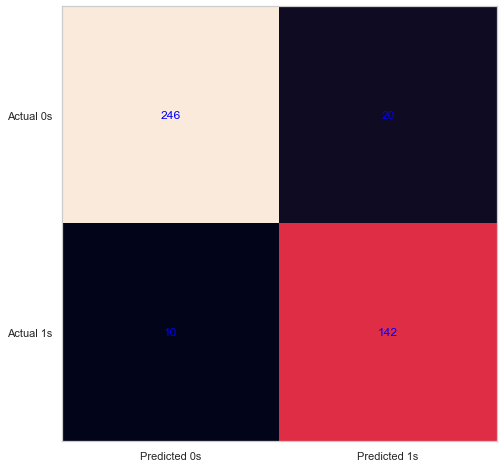

In [68]:
# Confusion Matrix 

fig, ax = plt.subplots(figsize=(8, 8),sharex=True)
ax.imshow(cm_sm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_sm[i, j], ha='center', va='center', color='blue')
plt.show()

# 4. Model Selection

## Model 1 

In [69]:
train_data_modelone=pd.get_dummies(data=train_data)

In [70]:
head(train_data_modelone)

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [71]:
Xtrain_data_modelone = train_data_modelone.loc[:, train_data_modelone.columns != 'Survived']
ytrain_data_modelone = train_data_modelone['Survived']

In [72]:
head(Xtrain_data_modelone)

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0
2,3,26.0,0,0,1,0,0,0,1
3,1,35.0,1,0,1,0,0,0,1
4,3,35.0,0,0,0,1,0,0,1


In [73]:
head(ytrain_data_modelone)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [74]:
test_data_modelone=pd.get_dummies(data=test_data)

In [75]:
head(test_data_modelone)

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,0,0,1,0,1,0
1,3,47.0,1,0,1,1,0,0,0,1
2,2,62.0,0,0,0,0,1,0,1,0
3,3,27.0,0,0,0,0,1,0,0,1
4,3,22.0,1,1,1,1,0,0,0,1


In [76]:
Xtest_data_modelone = test_data_modelone.loc[:, test_data_modelone.columns != 'Survived']
ytest_data_modelone = test_data_modelone['Survived']

In [77]:
head(Xtest_data_modelone)

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,0,1,0,1,0
1,3,47.0,1,0,1,0,0,0,1
2,2,62.0,0,0,0,1,0,1,0
3,3,27.0,0,0,0,1,0,0,1
4,3,22.0,1,1,1,0,0,0,1


In [78]:
head(ytest_data_modelone)

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [83]:
logistic_modelone = LogisticRegression(class_weight='balanced')
logistic_modelone = logistic_modelone.fit(Xtrain_data_modelone, ytrain_data_modelone)

In [84]:
predicted_modelone= logistic_modelone.predict(Xtest_data_modelone)

In [85]:
cm_modelone = confusion_matrix(ytest_data_modelone, predicted_modelone) 
print ("Confusion Matrix : \n", cm_modelone) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest_data_modelone,predicted_modelone))


Confusion Matrix : 
 [[231  35]
 [  5 147]]
Test accuracy =  0.9043062200956937


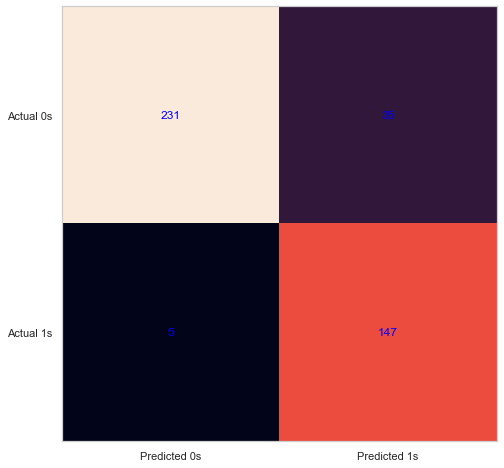

In [86]:

fig, ax = plt.subplots(figsize=(8, 8),sharex=True)
ax.imshow(cm_modelone)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_modelone[i, j], ha='center', va='center', color='blue')
plt.show()

In [87]:
print(metrics.classification_report(ytest_data_modelone, predicted_modelone))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       266
           1       0.81      0.97      0.88       152

    accuracy                           0.90       418
   macro avg       0.89      0.92      0.90       418
weighted avg       0.92      0.90      0.91       418



## Model two

In [88]:
train_data_modeltwo=train_data.loc[:,~train_data.columns.isin( ['SibSp','Parch','Age'])]

In [89]:
head(train_data_modeltwo)

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S


In [90]:
test_data_modeltwo=test_data.loc[:,~test_data.columns.isin( ['SibSp','Parch','Age'])]

In [91]:
head(test_data_modeltwo)

,Pclass,Sex,Embarked,Survived
0,3,male,Q,0
1,3,female,S,1
2,2,male,Q,0
3,3,male,S,0
4,3,female,S,1


In [92]:
Xtrain_data_modeltwo = train_data_modeltwo.loc[:, train_data_modeltwo.columns != 'Survived']
ytrain_data_modeltwo = train_data_modeltwo['Survived']

In [93]:
Xtest_data_modeltwo = test_data_modeltwo.loc[:, test_data_modeltwo.columns != 'Survived']
ytest_data_modeltwo = test_data_modeltwo['Survived']

In [94]:
head(Xtrain_data_modeltwo)

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [95]:
head(Xtest_data_modeltwo)

,Pclass,Sex,Embarked
0,3,male,Q
1,3,female,S
2,2,male,Q
3,3,male,S
4,3,female,S


In [96]:
head(ytrain_data_modeltwo)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [97]:
head(ytest_data_modeltwo)

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [98]:
Xtrain_data_modeltwo=pd.get_dummies(data=Xtrain_data_modeltwo)

In [99]:
Xtest_data_modeltwo=pd.get_dummies(data=Xtest_data_modeltwo)

In [100]:
head(Xtrain_data_modeltwo)

,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,1,0,0,1
1,1,1,0,1,0,0
2,3,1,0,0,0,1
3,1,1,0,0,0,1
4,3,0,1,0,0,1


In [101]:
head(Xtest_data_modeltwo)

,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,1,0,1,0
1,3,1,0,0,0,1
2,2,0,1,0,1,0
3,3,0,1,0,0,1
4,3,1,0,0,0,1


In [102]:
logistic_modeltwo = LogisticRegression(class_weight='balanced')
logistic_modeltwo = logistic_modeltwo.fit(Xtrain_data_modeltwo, ytrain_data_modeltwo)

In [104]:
predicted_modeltwo= logistic_modeltwo.predict(Xtest_data_modeltwo)

In [106]:
cm_modeltwo = confusion_matrix(ytest_data_modeltwo, predicted_modeltwo) 
print ("Confusion Matrix : \n",cm_modeltwo) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(ytest_data_modeltwo, predicted_modeltwo))

Confusion Matrix : 
 [[238  28]
 [  0 152]]
Test accuracy =  0.9330143540669856


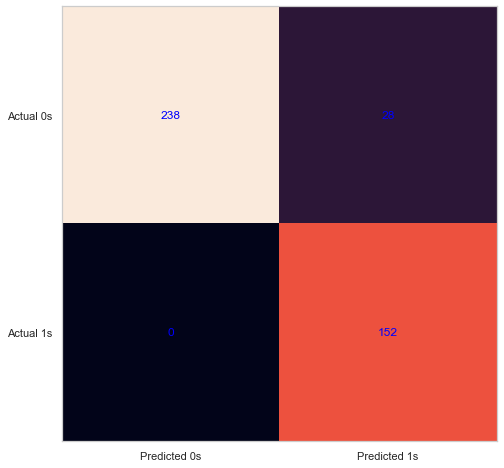

In [107]:
cm_modeltwo = confusion_matrix(ytest_data_modeltwo, predicted_modeltwo) 

fig, ax = plt.subplots(figsize=(8, 8),sharex=True)
ax.imshow(cm_modeltwo)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_modeltwo[i, j], ha='center', va='center', color='blue')
plt.show()

In [108]:
print(metrics.classification_report(ytest_data_modeltwo, predicted_modeltwo))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       266
           1       0.84      1.00      0.92       152

    accuracy                           0.93       418
   macro avg       0.92      0.95      0.93       418
weighted avg       0.94      0.93      0.93       418



## Model deployment

In [109]:
pickle.dump(logistic_modeltwo, open('model.pkl','wb'))

In [110]:
model = pickle.load(open('model.pkl','rb'))

In [111]:
print(model)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
